In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [2]:
FILE_NAME = "aml.csv"

data_orig = pd.read_csv(FILE_NAME)

In [3]:
data_orig.head()

,Unnamed: 0,time,cens,group
0,1,9,1,1
1,2,13,1,1
2,3,13,0,1
3,4,18,1,1
4,5,23,1,1


In [4]:
data_orig.shape

(23, 4)

In [5]:
# calcola la Survival Function usando Kaplan-Meier
# codice scritto da me
def calcola_km(df, col_time, col_esito):
    st = []
    timings = np.sort(df[col_time].unique())
    
    # inizializzo per il calcolo ricorsivo
    p = 1
    
    # i mesi sono ordinati
    for t in timings:
        # calcolo dt, nt
        # dt = quanti sono morti nel mese t
        dt = float(sum((df[col_esito] == 1) & (data_orig[col_time] == t)))
        # correzione: qui è importante il >= (non solo >)... 
        nt = float(sum(df[col_time] >= t))
        # calcolo la formula di Kaplan-Meier
        p = p * (1. - dt/nt)    
        # print(t)
        # print(p)
        # aggiungo alla list
        st.append(p)
    return st

In [12]:
timings = np.sort(data_orig['time'].unique())

st = calcola_km(data_orig, 'time', 'cens')

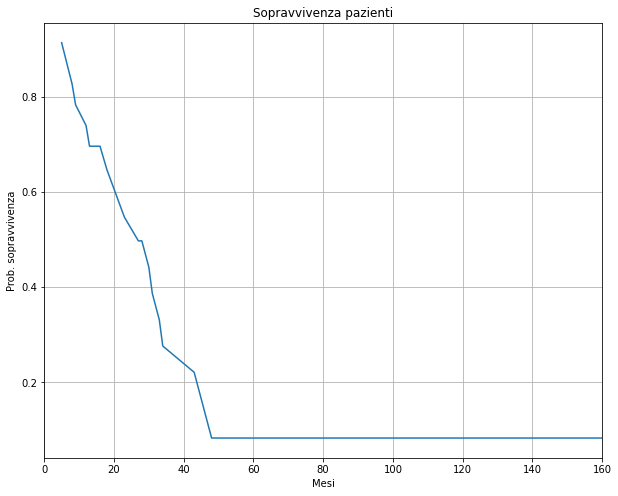

In [13]:
# ed ecco il plot della Survival function calcolata a mano
plt.figure(figsize=(10,8))
plt.xlim((0, 160))
plt.title('Sopravvivenza pazienti')
plt.xlabel('Mesi')
plt.ylabel('Prob. sopravvivenza')
plt.plot(timings, st)
plt.grid()

In [14]:
# usiamo ora il package *lifelines*
kmf = KaplanMeierFitter()

In [15]:
T = data_orig["time"]
E = data_orig["cens"]

kmf.fit(T, event_observed=E);

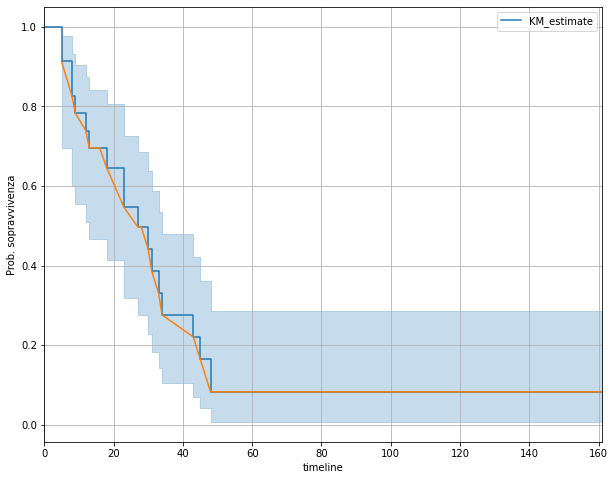

In [16]:
plt.figure(figsize=(10,8))
plt.xlabel('Mesi')
plt.ylabel('Prob. sopravvivenza')
kmf.plot()
plt.plot(timings, st, label='custom')
plt.grid()